# Importing Data in Python

As a data scientist, you will need to clean data, wrangle and munge it, visualize it, build predictive models, and interpret these models. Before you can do so, however, you will need to know how to get data into Python. In this notebook, you'll learn the many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, Stata, SAS, and MATLAB files; and from relational databases such as SQLite and PostgreSQL.

In order to import data into Python, you should first have an idea of what files are in your working directory.

IPython, which is running on DataCamp's servers, has a bunch of cool commands, including its **magic commands** ([more](https://ipython.readthedocs.io/en/stable/overview.html#main-features-of-the-interactive-shell)). For example, starting a line with `!` gives you complete system shell access. This means that the IPython magic command `! ls` will display the contents of your current directory. 

In [1]:
#! ls

You can also do this natively in Python using the library `os`, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

In [2]:
import os
wd = os.getcwd()
os.listdir(wd)[:5]

['310_Python_Basics.ipynb',
 '120_Rescaling.ipynb',
 '010_Data_Science.ipynb',
 '985_Books.ipynb',
 '435_kMeans_Clustering.ipynb']

## Flat Files
### Importing entire plain text files

In [3]:
# Open a file: file
file = open('data/moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

### Importing text files line by line
For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the `readline()` method, which allows you to do this. When a file called file is open, you can print out the first line by executing `file.readline()`. If you execute the same command again, the second line will print, and so on.

You can bind a variable file by using a **context manager** construct:

`with open('moby_dick.txt') as file:`

While still within this construct, the variable `file` will be bound to `open('huck_finn.txt');` thus, to print the file to the shell, all the code you need to execute is:

In [4]:
with open('data/moby_dick.txt') as file:
    print(file.readline())

CHAPTER 1. Loomings.



In [5]:
# Read & print the first 3 lines
with open('data/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



A **flat file** is a text file containg structured data (records, rows of fields or attributes), for example table data. Flat files can have a header, first row containing fields/attributes/column names.

### Importing flat files using NumPy

<class 'numpy.ndarray'>


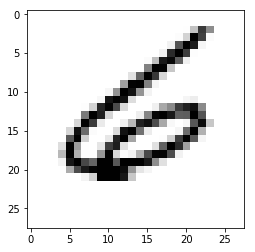

In [6]:
# Import package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# From: http://yann.lecun.com/exdb/mnist/

# Assign filename to variable: file
file = 'data/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show();

There are a number of arguments that `np.loadtxt()` takes that you'll find useful: `delimiter` changes the delimiter that `loadtxt()` is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; `skiprows` allows you to specify how many rows (not indices) you wish to skip; `usecols` takes a list of the indices of the columns you wish to keep.

Complete the arguments of `np.loadtxt()`: the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.

In [7]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'data/digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
#print(data)[:]
data[:10]

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       [4., 0.],
       [0., 0.],
       [0., 0.],
       [7., 0.],
       [3., 0.],
       [5., 0.],
       [3., 0.]])

### Importing different datatypes

The file `seaslug.txt`: 
- has a text header, consisting of strings
- is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. [Read more here](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html).

Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it could not convert string to float. There are two ways to deal with this: 
- firstly, you can set the data type argument `dtype` equal to str (for string).
- Alternatively, you can skip the first row as we have seen before, using the `skiprows` argument.

['Time' 'Percent']
[0.    0.357]


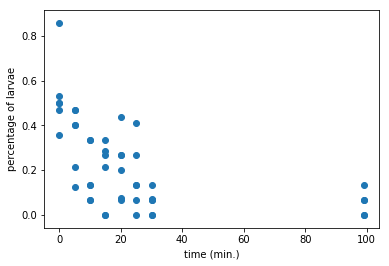

In [8]:
# Assign filename: file
file = 'data/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show();

Much of the time you will need to import datasets which have **different datatypes in different columns**; one column may contain strings and another floats, for example. The function `np.loadtxt()` will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.

Here, the first argument is the `filename`, the second specifies the `delimiter` , and the third argument `names` tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing `np.shape(data)`.

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name 'Fare', execute `data['Fare']`.

In [9]:
data = np.genfromtxt('data/titanic.csv', delimiter=',', names=True, dtype=None)
np.shape(data)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


(891,)

In [10]:
data[:5]

array([(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S'),
       (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C'),
       (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S'),
       (4, 1, 1, b'female', 35., 1, 0, b'113803', 53.1   , b'C123', b'S'),
       (5, 0, 3, b'male', 35., 0, 0, b'373450',  8.05  , b'', b'S')],
      dtype=[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')])

In [11]:
data[0]

(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171', 7.25, b'', b'S')

In [12]:
data['Fare'][:5]

array([ 7.25  , 71.2833,  7.925 , 53.1   ,  8.05  ])

In [13]:
data['Survived'][-4:]

array([1, 0, 1, 0])

To import data containing mixed datatypes, there is also another function `np.recfromcsv()` that behaves similarly to `np.genfromtxt()`, except that its default dtype is None. 

In [14]:
# Assign the filename: file
file = 'data/titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, delimiter=',', names=True, dtype=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/Users/ksatola/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2315: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importing flat files using pandas

In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the **DataFrame** object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions `read_csv()` and `read_table()`.

In [15]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = 'data/titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Assign the filename: file
file = 'data/digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = np.array(data)

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as `NA` or `NaN`.You're now going to import a slightly corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which
- contains comments after the character '#'
- is tab-delimited.

Complete the sep (the pandas version of delim), comment and na_values arguments of `pd.read_csv()`. `comment` takes characters that comments occur after in the file, which in this case is '#'. `na_values` takes a list of strings to recognize as NA/NaN, in this case the string 'Nothing'.

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket    Fare Cabin Embarked  
0         A/5 21171   7.250   NaN       S   
1          PC 17599     NaN   NaN      NaN  
2  STON/O2. 3101282   7.925   NaN        S  
3            113803  53.100  C123        S  
4            373450   8.050   NaN        S  


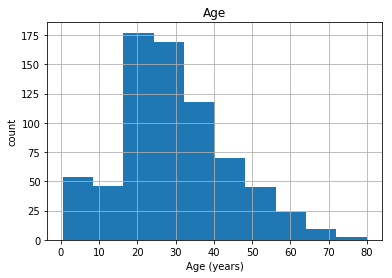

In [17]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'data/titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show();

## Loading a pickled file

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can **serialize** them. All this means is converting the object into a sequence of bytes, or a bytestream.

You'll import the `pickle` package, open a previously pickled data structure from a file and load it.

In [18]:
# Import pickle package
import pickle

In [19]:
data = {'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}

# open a file, where you ant to store the data
file = open('data/data.pkl', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()

In [20]:
# Open pickle file and load data: d
with open('data/data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>


## Importing Excel files

Given an **Excel file** imported into a variable spreadsheet, you can retrieve a list of the sheet names using the attribute `spreadsheet.sheet_names`.

Specifically, you'll be loading and checking out the spreadsheet `'battledeath.xlsx'`, modified from the Peace Research Institute Oslo's (PRIO) [dataset](https://www.prio.org/Data/Armed-Conflict/Battle-Deaths/The-Battle-Deaths-Dataset-version-30/). This data contains age-adjusted mortality rates due to war in various countries over several years.

In [21]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'data/battledeath.xlsx'

# Load spreadsheet: xl
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


Import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

In [22]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load the first sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


Add the additional arguments skiprows, names and usecols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

Parse the first sheet by index. In doing so, skip the first row of data and name the columns 'Country' and 'AAM due to War (2002)' using the argument names. The values passed to `skiprows` and `names` all need to be of type list.

Parse the second sheet by index. In doing so, parse only the first column with the `usecols` parameter, skip the first row and rename the column 'Country'. The argument passed to `usecols` also needs to be of type list.

In [23]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


## Importing SAS / Stata files using pandas

In [24]:
#! pip install sas7bdat

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

from sas7bdat import SAS7BDAT 

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


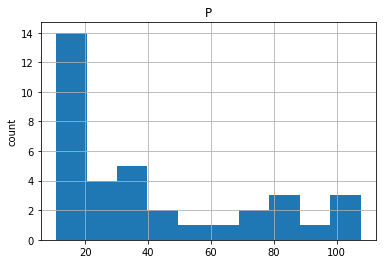

In [26]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show();

### Importing Stata Files

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

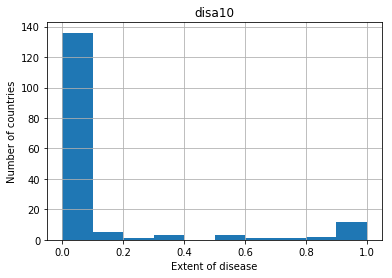

In [27]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('data/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show();

## Importing HDF5 files
Hierarchical data format version 5 can scale to exabytes.

You can find the LIGO data plus loads of documentation and tutorials [here](https://www.gw-openscience.org/events/GW150914/). There is also a great tutorial on Signal Processing with the data [here](https://www.gw-openscience.org/GW150914data/LOSC_Event_tutorial_GW150914.html).

In [28]:
#! pip install h5py

In [29]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'data/L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it. To do so, you'll need to first explore the HDF5 group 'strain'.

Strain


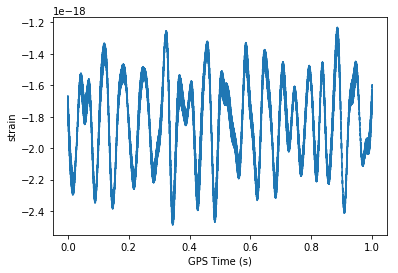

In [30]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show();

## Importing MATLAB files
MATLAB stands for 'Matrix Laboratory'.

The file contains gene expression data from the Albeck Lab at UCDavis. You can find the data and some great documentation [here](https://www.mcb.ucdavis.edu/faculty-labs/albeck/workshop.htm).

In [31]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('data/ja_data2.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


Use the method .keys() on the dictionary mat to print the keys. Most of these keys (in fact the ones that do NOT begin and end with '__') are variables from the corresponding MATLAB environment.

Print the type of the value corresponding to the key 'CYratioCyt' in mat. Recall that mat['CYratioCyt'] accesses the value.

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


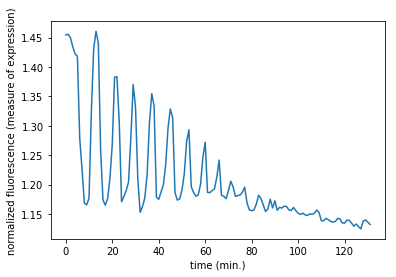

In [32]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show();

## Relational Databases (SQLite)

You'll create an engine to connect to the **SQLite database** 'Chinook.sqlite'. Remember that to create an engine to connect to 'Northwind.sqlite' you execute the command

`engine = create_engine('sqlite:///Northwind.sqlite')`

Here, `'sqlite:///Northwind.sqlite'` is called the **connection string** to the SQLite database Northwind.sqlite. 

In [33]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

In [34]:
# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [35]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

df.columns = rs.keys()

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


In [36]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


In [37]:
# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


In [38]:
# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

### Querying relational databases directly with pandas

In [39]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


In [40]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeID >= 6 ORDER BY BirthDate", engine)

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


### Exploiting table relationships (INNER JOIN)

In [41]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

In [42]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


In [43]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

query = """
SELECT * 
FROM PlaylistTrack 
INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId 
WHERE Milliseconds < 250000
"""

# Execute query and store records in DataFrame: df
df = pd.read_sql_query(query, engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  


## Importing data from the Internet

### Importing flat files from the web

In [44]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'data/winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('data/winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### With Pandas

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

/Users/ksatola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


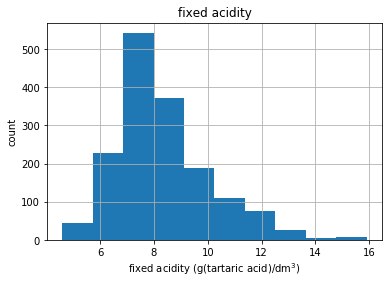

In [45]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show();

### Importing non-flat files from the web

Read the file in url into a dictionary `xl` using `pd.read_excel()` recalling that, in order to import all sheets you need to pass None to the argument `sheetname`.

In [46]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


### HTTP requests to import files from the web

#### Performing HTTP requests in Python using urllib

In [47]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


You have just packaged and sent a GET request to "http://www.datacamp.com/teach/documentation" and then caught the response. You saw that such a response is a `http.client.HTTPResponse` object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a `http.client.HTTPResponse` object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

In [48]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="SrIBgg4bopgoEmnd8/bo4shv/W73wmqgKhiKTGCSV1I="></script>\n      <script nonce="SrIBgg4bopgoEmnd8/bo4shv/W73wmqgKhiKTGCSV1I=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">\n\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Cen

#### Performing HTTP requests in Python using requests
Now that you've got your head and hands around making HTTP requests using the `urllib` package, you're going to figure out how to do the same using the higher-level `requests` library. Note that unlike in the previous exercises using `urllib`, you don't have to close the connection when using `requests`!

In [49]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="1qUIdeMnunF5e9sfgficEpERKzl2KRYpmV/JQoOkXM0="></script>
      <script nonce="1qUIdeMnunF5e9sfgficEpERKzl2KRYpmV/JQoOkXM0=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

## Scraping the web in Python

### Parsing HTML with BeautifulSoup
In this interactive exercise, you'll learn how to use the `BeautifulSoup` package to **parse, prettify and extract** information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own [Benevolent Dictator for Life](https://en.wikipedia.org/wiki/Benevolent_dictator_for_life). In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is `url = 'https://www.python.org/~guido/'`.

In [50]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a hr

**Extract the text** from the BDFL's webpage, along with printing the webpage's title.

In [51]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) pytho

**Extract the URLs of the hyperlinks** from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

In [52]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## Interacting with APIs to import data from the web

### Loading and exploring a JSON

In [53]:
import json

# Load JSON: json_data
with open("data/a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  571,335
imdbID:  tt1285016
Type:  movie
DVD:

### APIs and interacting with the world wide web

Now it's your turn to pull some movie data down from the **Open Movie Database (OMDB)** using their API. The movie you'll query the API about is The Social Network. To query the API about the movie Hackers, the query string is `'http://www.omdbapi.com/?t=the+social+network'` and had a single argument `t=the+social+network`. Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: `apikey=72bc447a`.

In [54]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?t=the+social+network&apikey=72bc447a'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"571,335","imdbID":"tt

In [55]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  571,335
imdbID:  tt1285016
Type:  movie
DVD:

#### Nested JSONs
Python can handle JSONs with JSONs because it will translate them into dictionaries within dictionaries.

In [56]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. In formal settings, like a restaurant, pizza is eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since 

#### The Twitter API and Authentication

The package `tweepy` is great at handling all the **Twitter API OAuth Authentication** details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials. Your task is to pass these credentials to tweepy's OAuth handler.

In [57]:
#! pip install tweepy

In [58]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#### Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! Your task is to create the `Streamobject` and to filter tweets according to particular keywords.

In [59]:
# From: https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4
        
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.error = False
        self.file = open("data/tweets_api.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 5 and self.error == False:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        self.error = True
        print(status)

In [ ]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(['data', 'science'])

#### Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: `tweets_data`.

In [ ]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

#### Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, `tweets_data`, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value `t1['text']`; similarly, the language is stored in `t1['lang']`. Your task is to build a DataFrame in which each row is a tweet and the columns are `'text'` and `'lang'`.

In [ ]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

#### A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the word 'data'. In the pre-exercise code, we have defined the following function `word_in_text()`, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

In [ ]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [ ]:
# Initialize list to store tweet counts
[data, science] = [0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    data += word_in_text('data', row['text'])
    science += word_in_text('science', row['text'])

#### Plotting your Twitter data
Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['data', 'science']

# Plot histogram
ax = sns.barplot(cd, [data, science])
ax.set(ylabel="count")
plt.show()